# EPL Referee Analysis

You are owner of a club in English Premier League.
You want to bribe the Football Association to assign a certain referees that might help us in home games.

In [14]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
%matplotlib inline

In [16]:
df1=pd.read_csv('season-1819.csv')
df2=pd.read_csv('season-1718.csv')
df3=pd.read_csv('season-1617.csv')
frames = [df1, df2, df3]
df=pd.concat(frames)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,LBH,LBD,LBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,NaN,NaN,NaN


In [17]:
droplist=list(df.columns)
droplist=droplist[droplist.index('B365H'):]

#drop all betting fields to see clearer dataframe
df.drop(droplist,axis=1,inplace=True)
#drop other unnecessary fields
df.drop(['Div','Date'],axis=1,inplace=True)

df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0


In [18]:
df_ref_grp = df.groupby('Referee')
#new referee dataframe
df_ref=df_ref_grp.mean()

#Select data from referees who have officiated at least 1/3 of the gameweeks
df_ref=df_ref.loc[df_ref_grp.count()['FTHG']>=38]
df_ref.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Referee,,,,,,,,,,,,,,,,
A Marriner,1.518072,1.542169,0.686747,0.771084,14.240964,11.277108,4.831325,4.325301,9.578313,9.204819,5.120482,4.469880,1.457831,1.493976,0.048193,0.060241
A Taylor,1.617978,1.112360,0.764045,0.460674,13.629213,12.134831,5.056180,4.235955,11.539326,11.000000,5.741573,4.573034,1.808989,1.707865,0.056180,0.011236
C Kavanagh,1.500000,1.050000,0.750000,0.475000,13.425000,10.825000,4.725000,3.800000,9.600000,10.250000,5.600000,4.500000,1.700000,1.575000,0.025000,0.075000
C Pawson,1.540541,1.202703,0.702703,0.445946,12.945946,11.797297,4.675676,3.945946,10.581081,11.162162,5.310811,4.851351,1.648649,1.959459,0.081081,0.121622
G Scott,2.066667,1.000000,0.666667,0.400000,14.266667,10.933333,4.866667,3.800000,9.533333,10.488889,5.822222,4.800000,0.911111,1.444444,0.022222,0.088889


We can also use pd.pivot_table to get the same table, but the columns would be sorted alphabetically. Our team would like to get more physical and take more tactical fouls. So we want referees who don't give out cards too easily.

In [19]:
#Add HomeBookingsPoints and AwayBookingsPoints, with Red=2.5*Yellow
df_ref['HBP']=df_ref['HY']+df_ref['HR']*2.5
df_ref['ABP']=df_ref['AY']+df_ref['AR']*2.5

#Add HomeBookingsAdvantage
df_ref['HBAdv']=df_ref['ABP']-df_ref['HBP']

#Firmness Level=TotalBookings/TotalFouls
df_ref['FL']=(df_ref['HBP']+df_ref['ABP'])/(df_ref['HF']+df_ref['AF'])
#Home Firmness Level
df_ref['HFL']=df_ref['HBP']/df_ref['HF']
#Away Firmness Level
df_ref['AFL']=df_ref['ABP']/df_ref['AF']
#Home Firemness Advantage
df_ref['HFAdv']=df_ref['AFL']-df_ref['HFL']

#Goals scored by home teams - away teams
df_ref['Score']=df_ref['FTHG']-df_ref['FTAG']

## Some regression

The correlation coefficient between home foul advantage and home booking advantage is 0.8912498423619205


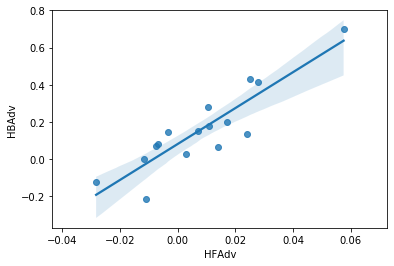

In [20]:
sns.regplot(x="HFAdv",y="HBAdv",data=df_ref)

print("The correlation coefficient between home foul advantage and home booking advantage is {}".format(df_ref['HBAdv'].corr(df_ref['HFAdv'])))

The correlation between ref's firmness level and home bookings advantage coefficient is -0.04344695453390938


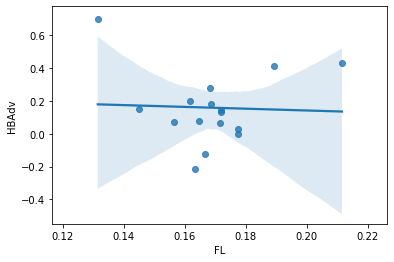

In [21]:
sns.regplot(x="FL",y="HBAdv",data=df_ref)

print("The correlation between ref's firmness level and home bookings advantage coefficient is {}".format(df_ref['HBAdv'].corr(df_ref['FL'])))

The correlation between ref's firmness level and score is -0.4031879314626827


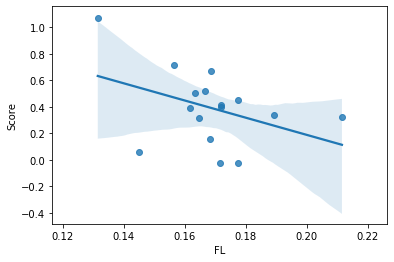

In [22]:
sns.regplot(x="FL",y="Score",data=df_ref)

print("The correlation between ref's firmness level and score is {}".format(df_ref['Score'].corr(df_ref['FL'])))

There's strong positive correlation between refs who give home team foul advantage and refs who give home team bookings advantage, so we can choose just one between these 2 metrics. Also we can say that ref's firmness level is uncorrelated to both home bookings advantage and score. 

In [23]:
#We limit our fields on important metrics
df_ref=df_ref[['FL','HBAdv','Score']]
df_ref.head()

,FL,HBAdv,Score
Referee,,,
A Marriner,0.171584,0.066265,-0.024096
A Taylor,0.163509,-0.213483,0.505618
C Kavanagh,0.177582,0.000000,0.450000
C Pawson,0.189248,0.412162,0.337838
G Scott,0.131521,0.700000,1.066667


In [24]:
#Normalisasi Adv Metrics
df_ref['Score']=(df_ref['Score']-df_ref['Score'].min())/(df_ref['Score'].max()-df_ref['Score'].min())
df_ref['HBAdv']=(df_ref['HBAdv']-df_ref['HBAdv'].min())/(df_ref['HBAdv'].max()-df_ref['HBAdv'].min())
df_ref['FL']=(df_ref['FL']-df_ref['FL'].min())/(df_ref['FL'].max()-df_ref['FL'].min())
#showing 'unfirmness' level = 1-FL instead of FL would be better
df_ref['uFL']=1-df_ref['FL']

df_ref=df_ref[['uFL','Score','HBAdv']]
df_ref.head()

,uFL,Score,HBAdv
Referee,,,
A Marriner,0.499111,0.000000,0.306243
A Taylor,0.600065,0.485637,0.000000
C Kavanagh,0.424128,0.434647,0.233702
C Pawson,0.278275,0.331817,0.684901
G Scott,1.000000,1.000000,1.000000


In [25]:
#Create a final metric to sort referees
df_ref['FMetric']=(df_ref['uFL']+df_ref['Score']+df_ref['HBAdv'])/3
df_ref.sort_values('FMetric',ascending=False, inplace=True)

df_ref.drop('FMetric',axis=1,inplace=True)

## Plotting

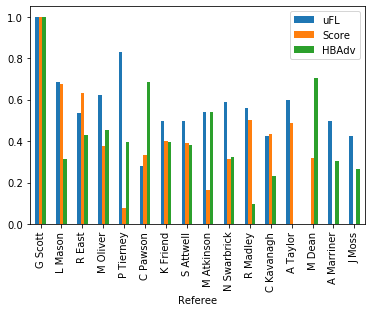

In [26]:
df_ref.plot.bar()

Maybe there's better way to visualize these data

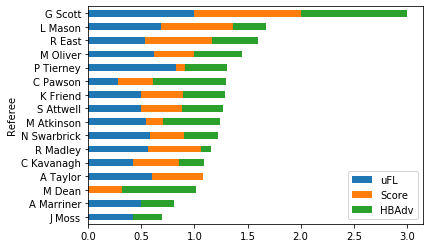

In [27]:
df_ref.plot.barh(stacked=True)
plt.gca().invert_yaxis()

We can clearly see that G Scott is on different level.

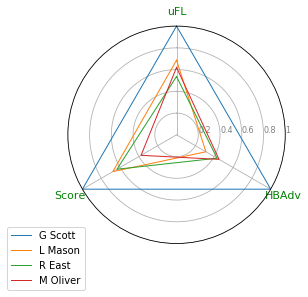

In [28]:
# number of variable
categories=list(df_ref)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [(n / float(N) * 2 * pi) for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='green', size=11)
 
# Draw ylabels
ax.set_rlabel_position(-90)
plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=8)
plt.ylim(0,1)

#Plot
n_ref=4 #Select the number of referees shown
for i in range(n_ref):
    values=df_ref.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df_ref.index[i])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

G Scott is clearly our best choice